In [43]:
import pandas as pd
import numpy as np
import random
from scipy.spatial import distance

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [44]:
def most_frequent(samples):
    counter = 0
    num = samples[0]

    for i in samples:
        curr_frequency = samples.count(i)
        if curr_frequency > counter:
            counter = curr_frequency
            num = i
    return num

In [45]:
class Classifier:
    def __init__(self, neigh, t_size):
        self.neigh = neigh
        self.t_size = t_size

    def fit(self, fit_data):
        self.fit_data = fit_data

    def predict(self, testing_data):
        self.testing_data = testing_data
        prediction = []
        counter = 0

        for i in self.testing_data:
            classes = []
            distances = []
            for k in self.fit_data:
                x = np.asarray(i[:-1])
                y = np.asarray(k[:-1])
                dist = distance.euclidean(x, y)
                distances.append([dist, k[-1]])
            counter += 1
            distances.sort(key=lambda p: p[0])
            for l in range(0, self.neigh):
                classes.append(distances[l][1])
            guess = most_frequent(classes)
            prediction.append(guess)
           
        len_predict = len(prediction)
        correct = 0
        wrong = 0
        for n in range(0, len_predict):
            if self.testing_data[n][6] == prediction[n]:
                correct += 1
            else:
                wrong += 1

        accuracy = correct / self.t_size
        print("Accuracy: {}%".format(round(accuracy*100, 2)))
        return accuracy 

In [46]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [47]:
df.drop(['mode', 'released_year', 'track_name', 'artist(s)_name', 'artist_count', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key'], axis=1, inplace=True)
df

,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,80,89,83,31,0,8,4
1,71,61,74,7,0,10,4
2,51,32,53,17,0,31,6
3,55,58,72,11,0,11,15
4,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...
948,60,24,39,57,0,8,3
949,42,7,24,83,1,12,6
950,80,81,67,4,0,8,6
951,82,67,77,8,0,12,5


In [48]:
df.columns
df.shape

(953, 7)

In [49]:
df.drop(df.index[100:], inplace=True)
full_data = df.astype(float).values.tolist()

In [50]:
random.seed(42)
random.shuffle(full_data)

In [51]:
test_size = 0.3
test_data_size = test_size * len(full_data)
train_data = full_data[:-int(test_size * len(full_data))]
test_data = full_data[-int(test_size * len(full_data)):]
print(test_data_size)

30.0


In [52]:
k_values = [i for i in range (1,20)]
accuracies = []
for k in k_values:
    knn = Classifier(k, test_data_size)
    knn.fit(train_data)
    accuracy = knn.predict(test_data)
    accuracies.append(np.mean( accuracy))

Accuracy: 30.0%
Accuracy: 30.0%
Accuracy: 33.33%
Accuracy: 36.67%
Accuracy: 40.0%
Accuracy: 36.67%
Accuracy: 33.33%
Accuracy: 36.67%
Accuracy: 36.67%


Accuracy: 30.0%
Accuracy: 30.0%
Accuracy: 33.33%
Accuracy: 26.67%
Accuracy: 33.33%
Accuracy: 30.0%
Accuracy: 26.67%
Accuracy: 26.67%
Accuracy: 26.67%
Accuracy: 23.33%


Text(0, 0.5, 'Accuracy Score')

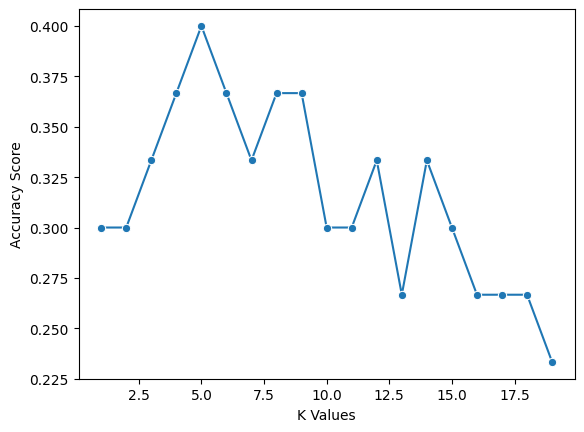

In [53]:
sns.lineplot(x = k_values, y = accuracies, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [54]:
k_neigh = 6
knn = Classifier(k_neigh, test_data_size)
knn.fit(train_data)
knn.predict(test_data)

Accuracy: 36.67%


0.36666666666666664